In [2]:
from configs import DataConfig
from configs import ModelConfig
from pipelines import Data
from pipelines import Model

In [3]:
data_config = DataConfig()

data        = Data(config=data_config)

In [5]:
data.load()

splits  = data.prepare()
classes = splits[-1]

In [6]:
model_config = ModelConfig(type="mobilenet", by="blocks", classes=classes)

model        = Model(config=model_config)

In [7]:
model.build()

model.summary()

Total layers in model: 4
Base model trainable : False
Trainable weights    : 2
Non-trainable weights: 260


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (32, 7, 7, 1280)       │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (32, 1280)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 5)                │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
model.compile()

history = model.train(splits=(splits[0], splits[1]))

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 52s 586ms/step - accuracy: 0.4695 - f1_score: 0.4606 - loss: 1.4798 - precision: 0.5211 - recall: 0.3904 - val_accuracy: 0.7096 - val_f1_score: 0.7079 - val_loss: 0.8397 - val_precision: 0.7423 - val_recall: 0.6534
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 52s 607ms/step - accuracy: 0.7126 - f1_score: 0.7085 - loss: 0.8156 - precision: 0.7519 - recall: 0.6780 - val_accuracy: 0.7096 - val_f1_score: 0.7051 - val_loss: 0.8250 - val_precision: 0.7552 - val_recall: 0.6552
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 52s 606ms/step - accuracy: 0.7413 - f1_score: 0.7359 - loss: 0.7246 - precision: 0.7741 - recall: 0.6965 - val_accuracy: 0.7387 - val_f1_score: 0.7399 - val_loss: 0.8007 - val_precision: 0.7945 - val_recall: 0.6878


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 449ms/step - accuracy: 0.6984 - f1_score: 0.6908 - loss: 0.8420 - precision: 0.7339 - recall: 0.6742
----------------
Loss     : 0.88
Accuracy : 0.70
Recall   : 0.66
Precision: 0.73
F1 score : 0.69
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 463ms/step


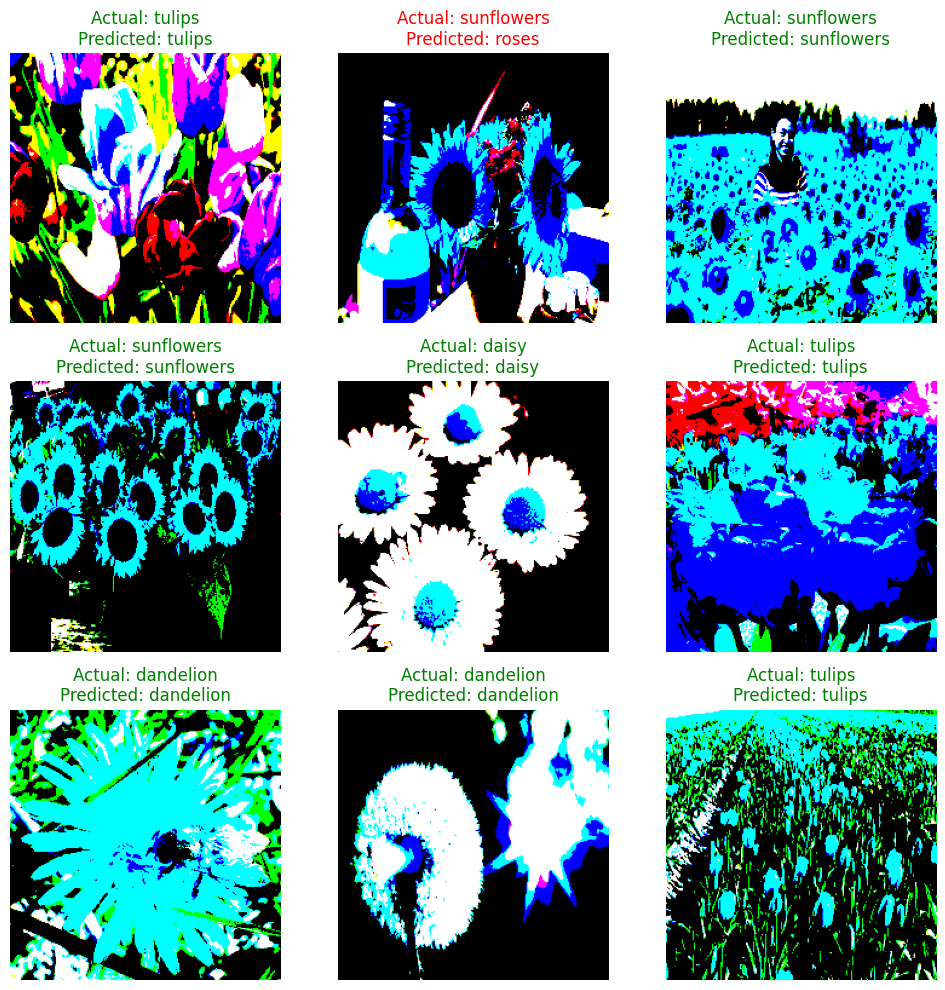

In [11]:
metrics = model.evaluate(splits=(splits[2]))

In [12]:
history_finetuned = model.finetune(splits=(splits[0], splits[1]))

Trainable layers      : ['global_average_pooling2d', 'dense', 'block_15_expand', 'block_15_expand_BN', 'block_15_expand_relu', 'block_15_depthwise', 'block_15_depthwise_BN', 'block_15_depthwise_relu', 'block_15_project', 'block_15_project_BN', 'block_15_add', 'block_16_expand', 'block_16_expand_BN', 'block_16_expand_relu', 'block_16_depthwise', 'block_16_depthwise_BN', 'block_16_depthwise_relu', 'block_16_project', 'block_16_project_BN']
Total trainable layers: 19
Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 54s 611ms/step - accuracy: 0.5970 - f1_score: 0.5838 - loss: 1.0854 - precision: 0.6677 - recall: 0.5161 - val_accuracy: 0.7387 - val_f1_score: 0.7395 - val_loss: 0.7927 - val_precision: 0.7945 - val_recall: 0.6878
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 54s 631ms/step - accuracy: 0.6209 - f1_score: 0.6120 - loss: 1.0370 - precision: 0.6964 - recall: 0.5241 - val_accuracy: 0.7314 - val_f1_score: 0.7319 - val_loss: 0.7891 - val_precision: 0.7941 - val_recall: 0.6860
Epoch 3/5
86/86 ━━━━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 456ms/step - accuracy: 0.7297 - f1_score: 0.7230 - loss: 0.8337 - precision: 0.7710 - recall: 0.6726
----------------
Loss     : 0.85
Accuracy : 0.72
Recall   : 0.66
Precision: 0.77
F1 score : 0.72
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 535ms/step


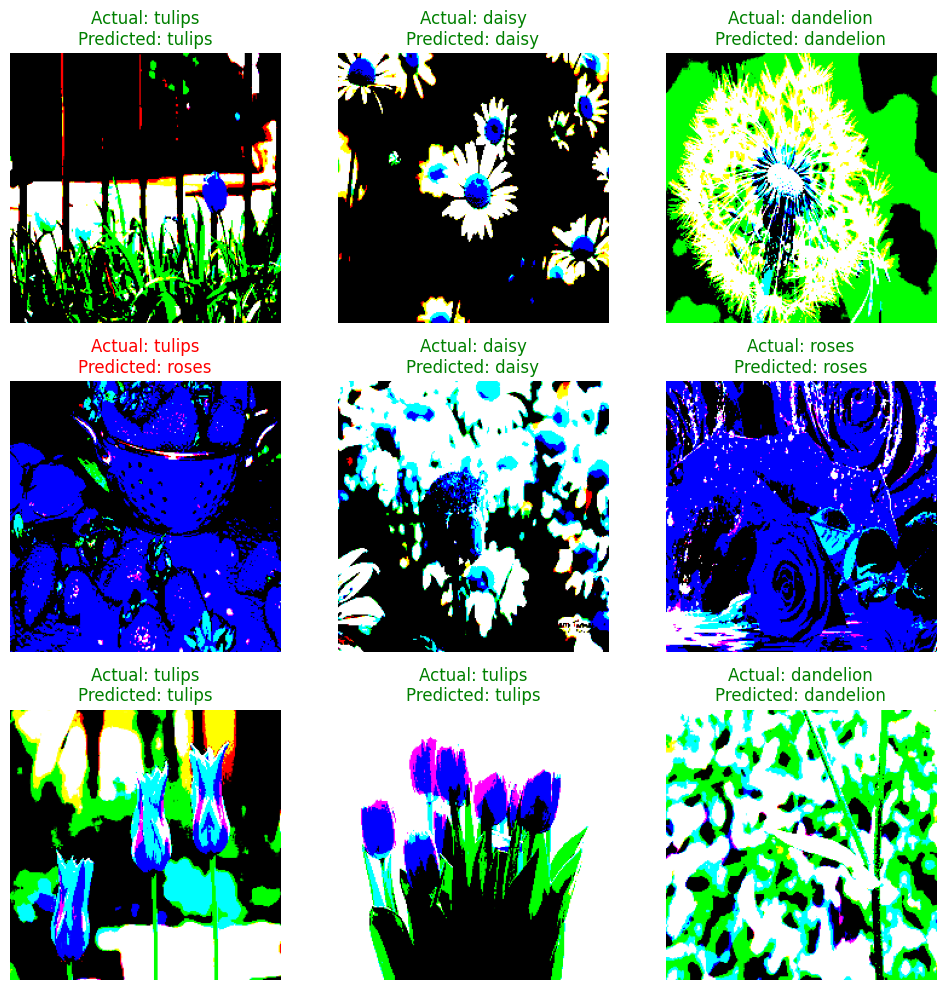

In [13]:
metrics = model.evaluate(splits=(splits[2]))

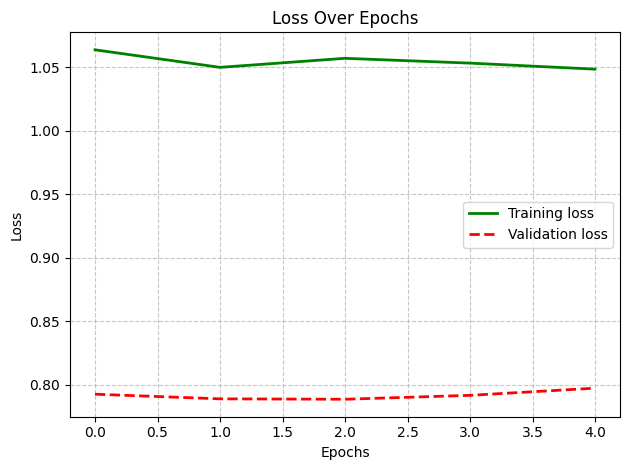

In [14]:
model.visualize_performance(history_finetuned, "loss")

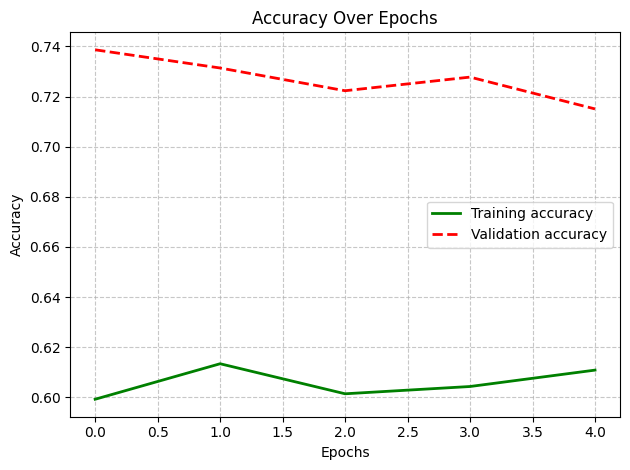

In [15]:
model.visualize_performance(history_finetuned, "accuracy")

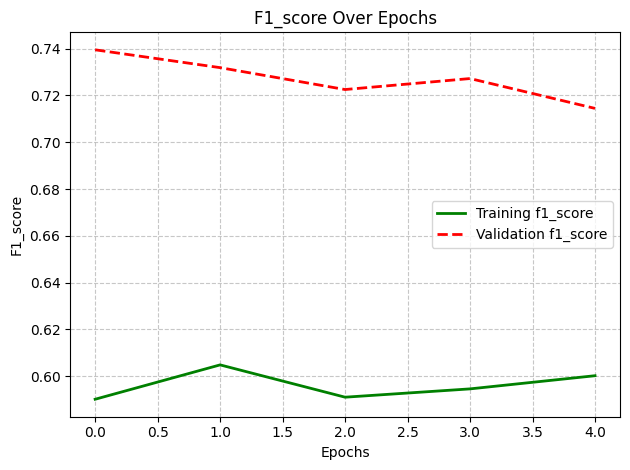

In [16]:
model.visualize_performance(history_finetuned, "f1_score")

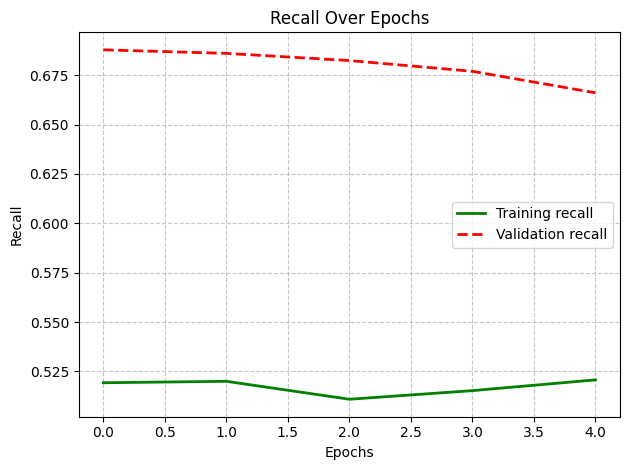

In [17]:
model.visualize_performance(history_finetuned, "recall")

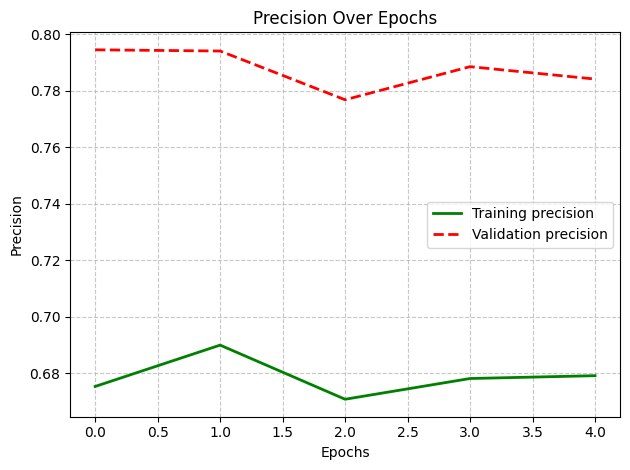

In [18]:
model.visualize_performance(history_finetuned, "precision")

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 455ms/step


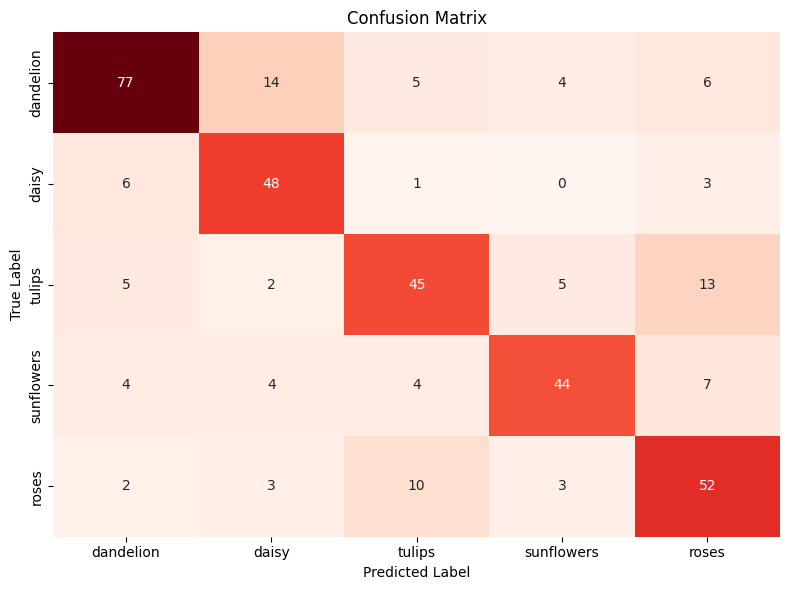

In [19]:
model.visualize_confusion_matrix(splits=splits[2])

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 450ms/step


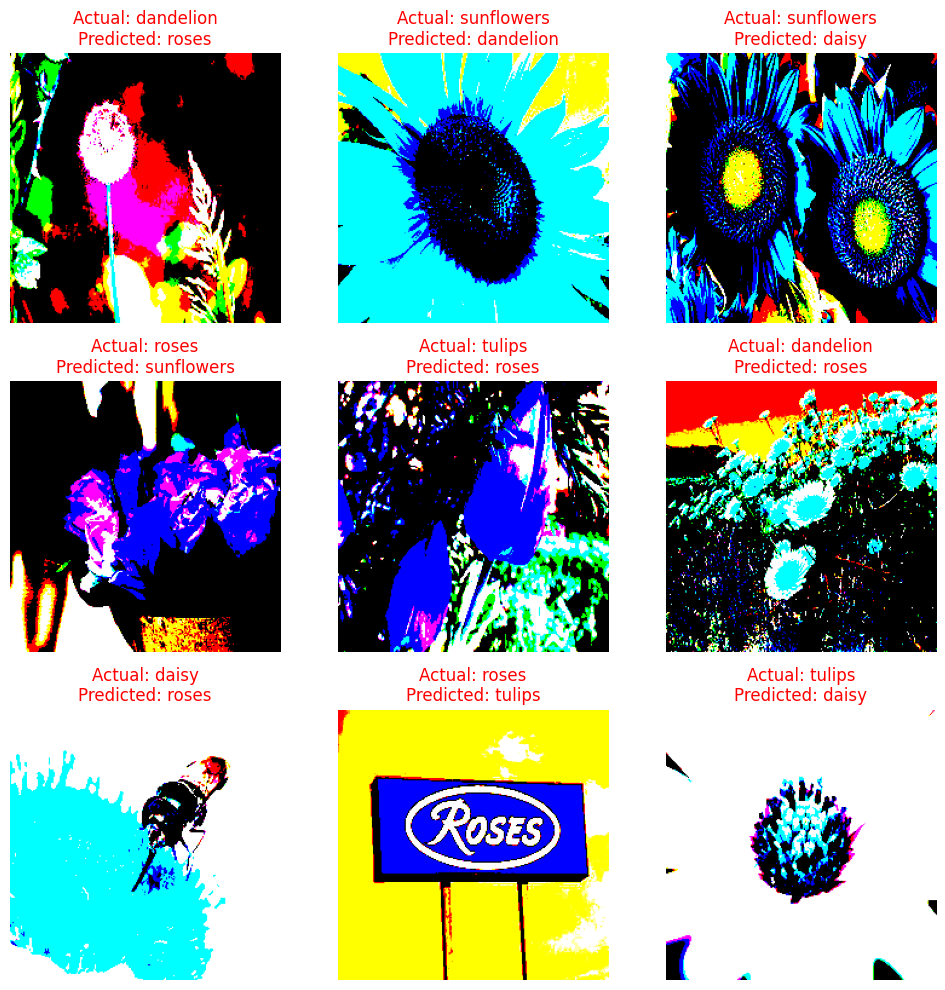

In [20]:
model.visualize_misclassifications(splits=splits[2])